# Writing own Stochastic Gradeint Descent

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining some functions that we will be using later
#MSE and R2
#Taken from courses jupyterbook
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

### Generating data

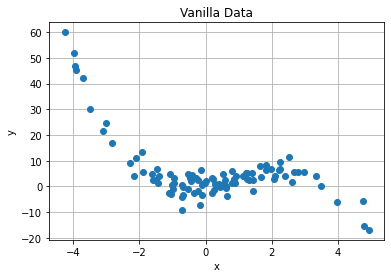

In [3]:
np.random.seed(10)
n = 100
x = 2 * np.random.randn(n,1)
y = -0.5*x**3 + 1.5*x**2 + 1.5*x + 3*np.random.randn(n,1)

plt.plot(x, y, 'o')
plt.title("Vanilla Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(1)
plt.show()

In [40]:
#Creating the design Matrix:

X = np.c_[np.ones((n, 1)), x, x**2, x**3]
#Defining the Hessian Matrix
H = (2.0/n) * X.T @ X
EigVal, EigVec = np.linalg.eig(H)
print(f"The eigenvalues of Hessian matrix are:{EigVal}")

Beta_start = np.random.randn(np.shape(X)[1],1)

The eigenvalues of Hessian matrix are:[1.47073846e+03 8.33372320e+01 1.26487821e+00 2.16734451e+00]


Because all eigenvalues of hessian matrix are positive, this means that the hessian matrix is positive definite. This means that the cost function is a convex function and we don't need to worry about getting stuck in some local minima.

## Method Functions

### Regular Gradient calculator

In [5]:
def regular_gradient(n, X, y, Beta):
    return (2.0/n) * X.T @ (X @ Beta - y)

### Step length calculator

In [54]:
def learning_schedule(t, t0, t1):
    return t0/(t + t1)

### Plain Gradient Descent

In [46]:
def plain_Gradient(learn_rate, N_iterations, X, y, Beta):
    n = np.shape(X)[0]
    for i in range(N_iterations):
        g = regular_gradient(n, X, y, Beta)
        Beta = Beta - learn_rate * g
    return Beta

### Plain Gradient Descent with momentum

In [45]:
def plain_Gradient_momentum(learn_rate, N_iterations, X, y, Beta):
    n = np.shape(X)[0]
    change = 0.0
    momentum = 0.3
    for i in range(N_iterations):
        g = regular_gradient(n, X, y, Beta)
        new_change = learn_rate*g + momentum*change
        Beta = Beta - new_change
        change = new_change
    return Beta

### Stochastic Gradient Descent without momentum with time decaying learningrate

In [57]:
def SGD(M, n_epoch, learn_rate, Beta):
    n = np.shape(X)[0]
    m = int(n/M) #number of minibatches
    t0 = 1.0
    t1 = 10
    gamma_j = t0/t1
    j = 0
    for epoch in range(1, n_epoch + 1):
        for i in range(m):
            random_index = M * np.random.randint(m) #Pick the random index
            X_batch = X[random_index:random_index+M]
            y_batch = y[random_index:random_index+M]
            g = (1/M) * regular_gradient(n, X_batch, y_batch, Beta)
            learn_rate = learning_schedule(epoch*m + i, t0, t1)
            Beta = Beta - learn_rate*g
    return Beta

### Stochastic Gradient Descent with momentum with time decaying learningrate


In [60]:
def SGD_momentum(M, n_epoch, learn_rate, Beta):
    n = np.shape(X)[0]
    m = int(n/M) #number of minibatches
    t0 = 1.0
    t1 = 10
    gamma_j = t0/t1
    j = 0
    change = 0.0
    momentum = 0.3
    for epoch in range(1, n_epoch + 1):
        for i in range(m):
            random_index = M * np.random.randint(m) #Pick the random index
            X_batch = X[random_index:random_index+M]
            y_batch = y[random_index:random_index+M]
            g = (1/M) * regular_gradient(n, X_batch, y_batch, Beta)
            learn_rate = learning_schedule(epoch*m + i, t0, t1)
            new_change = learn_rate*g + momentum*change
            Beta = Beta - new_change
            change = new_change
    return Beta

### Plain GD, without momentum, with Adagrad method

In [ ]:
def GD_Adagrad(learn_rate, N_iterations, X, y, Beta):
    n = np.shape(X)[0]
    epsilon = 1e-8
    G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
    for i in range(N_iterations):
        g = regular_gradient(n, X, y, Beta)
        G = G + (g @ g.T)
        G_inverse = np.c_[learn_rate/(epsilon+np.sqrt(np.diagonal(G)))]
        update = np.multiply(G_inverse, g)
        Beta = Beta - update
    return Beta

### Plain GD, with momentum and Adagrad method

In [1]:
def GD_Adagrad(learn_rate, N_iterations, X, y, Beta):
    n = np.shape(X)[0]
    epsilon = 1e-8
    G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
    change = 0.0
    momentum = 0.3
    for i in range(N_iterations):
        g = regular_gradient(n, X, y, Beta)
        G = G + (g @ g.T)
        G_inverse = np.c_[learn_rate/(epsilon+np.sqrt(np.diagonal(G)))]
        update = np.multiply(G_inverse, g)
        new_change = update + momentum*change
        change = new_change
        Beta = Beta - new_change
    return Beta

### SGD, without momentun, with Adagrad method

In [2]:
def SGD(M, n_epoch, learn_rate, Beta):
    n = np.shape(X)[0]
    m = int(n/M) #number of minibatches
    t0 = 1.0
    t1 = 10
    gamma_j = t0/t1
    j = 0
    epsilon = 1e-8
    for epoch in range(1, n_epoch + 1):
        G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
        for i in range(m):
            random_index = M * np.random.randint(m) #Pick the random index
            X_batch = X[random_index:random_index+M]
            y_batch = y[random_index:random_index+M]
            g = (1/M) * regular_gradient(n, X_batch, y_batch, Beta)
            G = G + (g @ g.T)
            G_inverse = np.c_[learn_rate / ( epsilon + np.sqrt(np.diagonal(G)) )]
            update = np.multiply(G_inverse, g)
            Beta = Beta - update
    return Beta

### SGD, with momentum and Adagrad method

In [4]:
def SGD_momentum(M, n_epoch, learn_rate, Beta):
    n = np.shape(X)[0]
    m = int(n/M) #number of minibatches
    t0 = 1.0
    t1 = 10
    gamma_j = t0/t1
    j = 0
    change = 0.0
    momentum = 0.3
    for epoch in range(1, n_epoch + 1):
        G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
        for i in range(m):
            random_index = M * np.random.randint(m) #Pick the random index
            X_batch = X[random_index:random_index+M]
            y_batch = y[random_index:random_index+M]
            g = (1/M) * regular_gradient(n, X_batch, y_batch, Beta)
            G = G + (g @ g.T)
            new_change = learn_rate*g + momentum*change
            new_change = np.multiply(G_inverse, g) + momentum*change
            Beta = Beta - new_change
            change = new_change
    return Beta

### RMSProp method

In [9]:
def RMSprop(M, n_epoch, learn_rate, Beta):
    rho = 0.99
    for epoch in range(n_epochs):
        G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
        for i in range(m):
            random_index = M*np.random.randint(m)
            X_minibatch = X[random_index:random_index + M]
            y_minibatch = y[random_index:random_index + M]
            g = (1/M) * plain_Gradient(learn_rate, N_iterations, X_minibatch, y_minibatch, Beta)
            prev_G = G
            G = G + (g @ g.T)
            G_new = (rho * prev_G + (1 - rho) * G)
            G_inverse = np.c_[learn_rate / (epsilon + np.sqrt(np.diagonal(G_new)))]
            update = np.multiply(G_inverse , g)
            Beta = Beta - update
    return Beta
    

### Adam method for SGD

In [8]:
#This method is simply RMSprop method and GD with momentum combined together
def Adam(M, n_epoch, learn_rate, Beta):
    rho = 0.99
    for epoch in range(n_epochs):
        G = np.zeros(shape=(np.shape(X)[1],np.shape(X)[1]))
        for i in range(m):
            random_index = M*np.random.randint(m)
            X_minibatch = X[random_index:random_index + M]
            y_minibatch = y[random_index:random_index + M]
            g = (1/M) * plain_Gradient(learn_rate, N_iterations, X_minibatch, y_minibatch, Beta)

            prev_G = G
            G = G + (g @ g.T)

            G_new = (rho * prev_G + (1 - rho) * G)

            G_inverse = np.c_[learn_rate / (epsilon + np.sqrt(np.diagonal(G_new)))]
            new_change = np.multiply(G_inverse , g) + momentum*change
            change = new_change
            Beta = Beta - new_change
    
    return Beta

Why implementing momentum? It goes fasterrr. Illustrate this with a drawing, say that the gradient descent kinda zigzags towards the minima. These zigzags takes up a lot of time, and prevents us from using low learning rate. 

Here we can see that we dont need as many iterations as we did without the momentum. The difference is small tho. Try making a MSE agains iteration number comparison.

Here dicuss a little bit about the learning rate. Why do we get error when learning rate is higher that 0.01. And why do we get really high MSE when learning rate goes to zero.

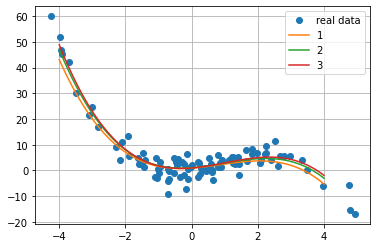

In [50]:
#Variables that we usually use:
M = 5 #size of each minibatch
n_epoch = 10 #number of epochs
learn_rate = 1.0/np.max(EigVal) #The learning rate, this gives the lowest MSE
N_itearations = 30 #number of iterations


#Comparing everything
test_x = np.linspace(-4, 4, n)
test_X = np.c_[np.ones((n, 1)), test_x, test_x**2, test_x**3]

y1 = test_X @ Beta1
y2 = test_X @ Beta2
y3 = test_X @ Beta3

plt.plot(x, y, "o", label="real data")
plt.plot(test_x, y1, label="1")
plt.plot(test_x, y2, label="2")
plt.plot(test_x, y3, label="3")
plt.grid(1)
plt.legend()

plt.show()